<a href="https://colab.research.google.com/github/qalhata/QTET_Day1/blob/main/QTechTraining_Day1_UseCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import random
import datetime
from matplotlib import pyplot as plt
import seaborn as sns


In [29]:
# Seaborn style and context
sns.set_style("white")
sns.set_context("paper")
sns.set_palette("Blues")
sns.set(font_scale=0.6)

# Matplotlib defaults
plt.rcParams['figure.figsize'] = [10, 6]  # Default figure size (width, height)
plt.rcParams['axes.titlesize'] = 12       # Default title size
plt.rcParams['axes.labelsize'] = 10       # Default label size for x and y axes
plt.rcParams['xtick.labelsize'] = 8       # Default x-tick label size
plt.rcParams['ytick.labelsize'] = 8       # Default y-tick label size

In [30]:
# Generate synthetic traffic flow data
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 1, 7)
date_range = pd.date_range(start_date, end_date, freq='H')
traffic_data = {
    'Timestamp': date_range,
    'Traffic_Volume': [random.randint(100, 500) for _ in range(len(date_range))],
    'Congestion_Level': [random.uniform(0, 1) for _ in range(len(date_range))]
}
traffic_df = pd.DataFrame(traffic_data)

In [31]:
# Generate synthetic demographic data
num_samples = 1000
age = [random.randint(18, 70) for _ in range(num_samples)]
income = [random.randint(20000, 100000) for _ in range(num_samples)]
transportation_mode = [random.choice(['Car', 'Public Transit', 'Cycling']) for _ in range(num_samples)]
demographic_data = {
    'Age': age,
    'Income': income,
    'Transportation_Mode': transportation_mode
}
demographic_df = pd.DataFrame(demographic_data)

In [32]:
# Save data to CSV files
traffic_df.to_csv('traffic_flow_data.csv', index=False)
demographic_df.to_csv('demographic_data.csv', index=False)

**Sample Data Analysis**

In [33]:
# Load data
traffic_df = pd.read_csv('traffic_flow_data.csv')
demographic_df = pd.read_csv('demographic_data.csv')

In [35]:
traffic_df.head()

,Timestamp,Traffic_Volume,Congestion_Level
0,2023-01-01 00:00:00,495,0.494133
1,2023-01-01 01:00:00,448,0.832023
2,2023-01-01 02:00:00,208,0.563675
3,2023-01-01 03:00:00,201,0.319067
4,2023-01-01 04:00:00,104,0.709603


In [17]:
demographic_df.head()

,Age,Income,Transportation_Mode
0,30,42812,Public Transit
1,42,88861,Car
2,37,98830,Public Transit
3,58,87320,Car
4,58,60586,Car


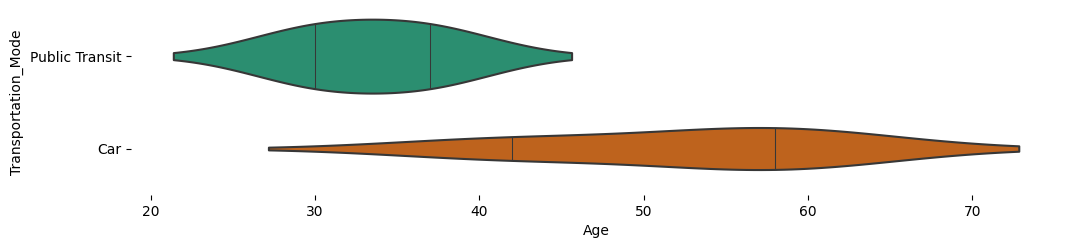

In [16]:
# Distributions
figsize = (12, 1.2 * len(_df_6['Transportation_Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Age', y='Transportation_Mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

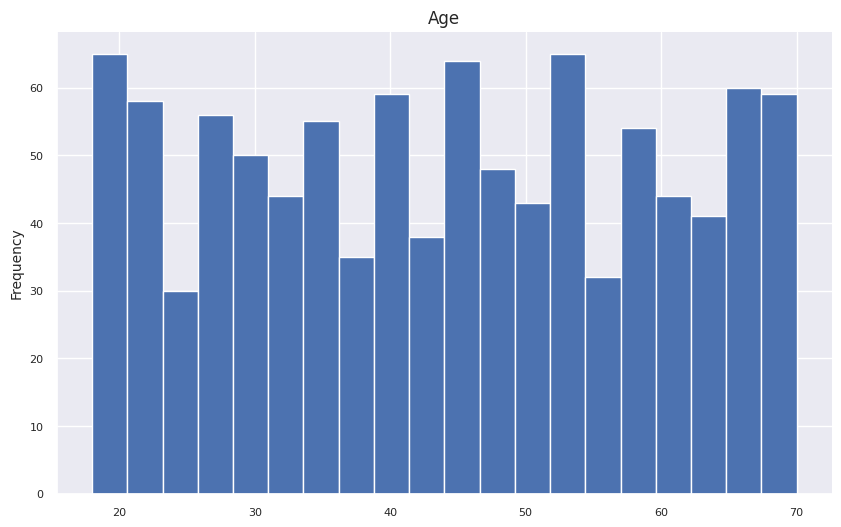

In [41]:
# Plot 2

demographic_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

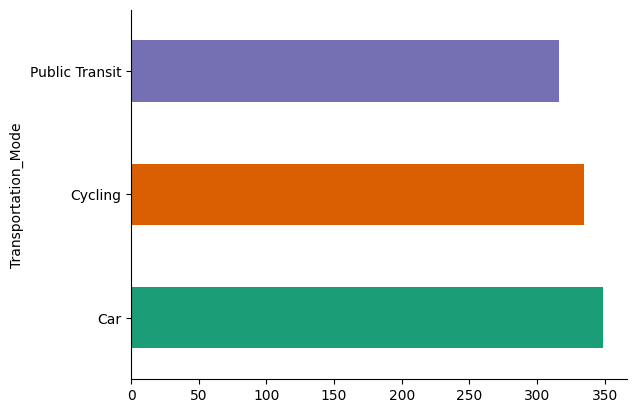

In [28]:
# Plot 3

demographic_df.groupby('Transportation_Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
# Convert 'Timestamp' column to datetime data type
traffic_df['Timestamp'] = pd.to_datetime(traffic_df['Timestamp'])

In [37]:
# Analyze traffic congestion trends
average_congestion = traffic_df.groupby(traffic_df['Timestamp'].dt.dayofweek)['Congestion_Level'].mean()
print("Average Congestion Levels by Day of Week:")
print(average_congestion)

Average Congestion Levels by Day of Week:
Timestamp
0    0.517697
1    0.670166
2    0.542014
3    0.526716
4    0.563819
5    0.131921
6    0.499443
Name: Congestion_Level, dtype: float64


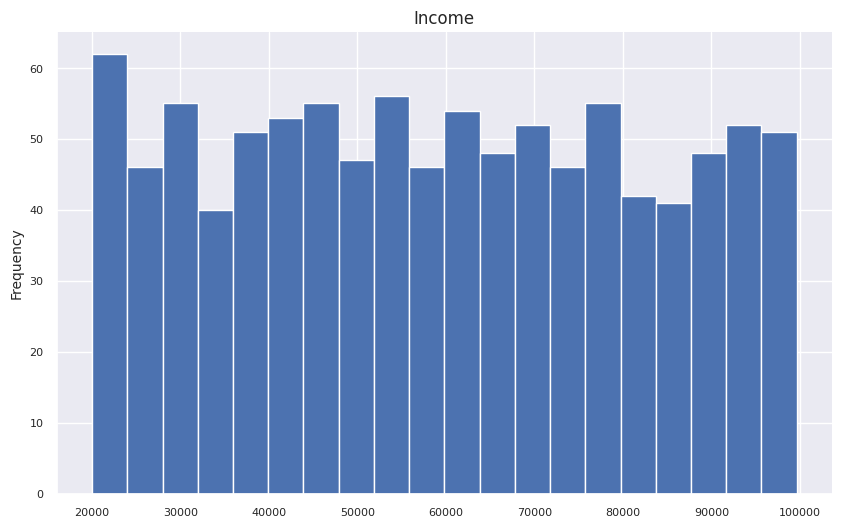

In [38]:
# Plot 1
demographic_df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
# Explore the impact of transportation mode on traffic
mode_traffic = demographic_df.groupby('Transportation_Mode')['Age'].count()
print("Transportation Mode Distribution:")
print(mode_traffic)

Transportation Mode Distribution:
Transportation_Mode
Car               356
Cycling           322
Public Transit    322
Name: Age, dtype: int64


In [40]:
# Simulate policy recommendations based on data
if average_congestion[0] > average_congestion[4]:
    print("Recommendation: Implement congestion pricing during weekdays.")
else:
    print("Recommendation: Invest in public transit infrastructure and promote carpooling.")

Recommendation: Invest in public transit infrastructure and promote carpooling.
